## Gender Recognition Neural Network:

In this notebook, we are going to practice handling 3 dimensional data, specifically, computer vision. In the data file, there are two further files, in which there are photos of men and women. Note that the images are cropped. In total, we have approximately 57,000 images: ~23,000 training images of each class and ~5,500 testing images of each class.

We are going to design a convolutional neural network that can distinguish the two sexes.

The requisite steps:
- Import the data
- standardise the data
- Shuffling the data
- Creating the model
- Fine-tuning the model
- Testing the model

## Importing necessary modules:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.image import imread


import tensorflow
import tensorflow as tf


from tensorflow.python.keras.models import Sequential
from tensorflow import keras
from keras import layers, models, initializers
from keras.utils import image_dataset_from_directory, load_img, img_to_array, array_to_img

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import Image

import os
import random

In [24]:
tensorflow.__version__

'2.9.0'

## What our dataset looks like:

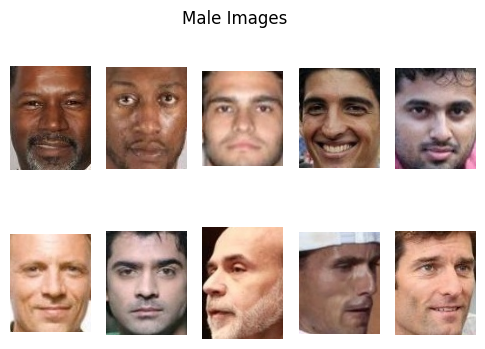

In [25]:
train_path = '../data/Training'
test_path = '..data/Testing'

plt.figure(dpi = 100)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.suptitle('Male Images')
    image_path = random.choice(os.listdir(train_path + '/male'))
    image = load_img(train_path + '/male/' + image_path)
    plt.axis ('off')
    plt.imshow(image)

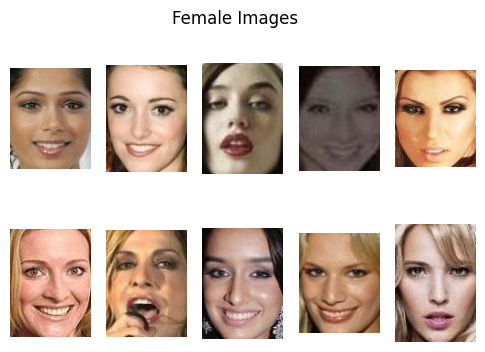

In [26]:
plt.figure(dpi = 100)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.suptitle('Female Images')
    image_path = random.choice(os.listdir(train_path + '/female'))
    image = load_img(train_path + '/female/' + image_path)
    plt.axis ('off')
    plt.imshow(image)


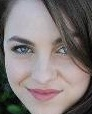

In [27]:
image = load_img('../data/Training/female/131422.jpg.jpg') 
image

In [28]:
print(type(image), image.format, image.mode, image.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'> JPEG RGB (92, 114)


In [29]:
array = img_to_array(image)
array.shape

(114, 92, 3)

## Importing the entire data set:

- We change the shape of the photos to a 200x200x3 image.
- There are two labels: 0 denotes women and 1 denotes men.

In [43]:
train_set = image_dataset_from_directory('../data/Training', label_mode =  'binary', image_size = (200, 200), batch_size = 64, shuffle = True)
test_set = image_dataset_from_directory('../data/Testing', label_mode =  'binary', image_size = (200, 200), batch_size = 64, shuffle = True)

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


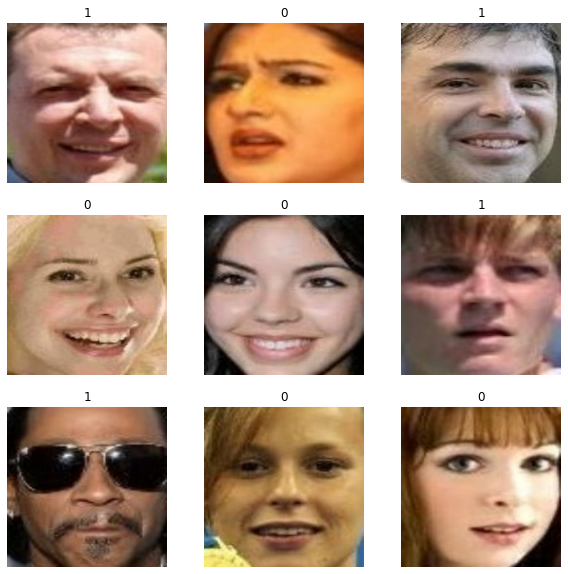

In [44]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [45]:
print(train_set.class_names)

['female', 'male']


## Creating the model:

In [64]:
kernel_size=(3,3) # The size of kernel

model = models.Sequential(
    [
        layers.Rescaling(1.0/255, input_shape = (200, 200, 3)),    
        layers.Conv2D(64, kernel_size, padding="same", activation = 'relu'),
        layers.Dropout(0.2),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, kernel_size, activation='relu'),
        layers.Dropout(0.2),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, kernel_size, activation='relu'),
        layers.Dropout(0.2),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, kernel_size, activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, kernel_size, activation='relu'), 
        layers.MaxPooling2D((2,2)),
               
        layers.Flatten(),
        layers.Dense(256, activation="relu"),  
        layers.Dense(64, activation="relu"),  
        layers.Dense(1, activation="sigmoid")
    ]
)
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_21 (Rescaling)    (None, 200, 200, 3)       0         
                                                                 
 conv2d_107 (Conv2D)         (None, 200, 200, 64)      1792      
                                                                 
 dropout_40 (Dropout)        (None, 200, 200, 64)      0         
                                                                 
 max_pooling2d_107 (MaxPooli  (None, 100, 100, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_108 (Conv2D)         (None, 98, 98, 64)        36928     
                                                                 
 dropout_41 (Dropout)        (None, 98, 98, 64)        0         
                                                     

## Training the model:

- We have reached an accuracy of 90% - could reach higher.

In [65]:
history = model.fit(train_set, steps_per_epoch = 50, epochs = 10, validation_data = test_set, validation_steps = 30)

Epoch 1/10
50/50 [==============================] - 274s 5s/step - loss: 0.6947 - accuracy: 0.5247 - val_loss: 0.6785 - val_accuracy: 0.7255
Epoch 2/10
50/50 [==============================] - 272s 5s/step - loss: 0.5276 - accuracy: 0.7541 - val_loss: 0.5129 - val_accuracy: 0.8036
Epoch 3/10
50/50 [==============================] - 281s 6s/step - loss: 0.4759 - accuracy: 0.7947 - val_loss: 0.4394 - val_accuracy: 0.8380
Epoch 4/10
50/50 [==============================] - 282s 6s/step - loss: 0.3909 - accuracy: 0.8431 - val_loss: 0.4251 - val_accuracy: 0.8661
Epoch 5/10
50/50 [==============================] - 1460s 30s/step - loss: 0.3516 - accuracy: 0.8597 - val_loss: 0.4287 - val_accuracy: 0.8135
Epoch 6/10
50/50 [==============================] - 276s 6s/step - loss: 0.3295 - accuracy: 0.8687 - val_loss: 0.3490 - val_accuracy: 0.8792
Epoch 7/10
50/50 [==============================] - 274s 6s/step - loss: 0.2980 - accuracy: 0.8784 - val_loss: 0.3148 - val_accuracy: 0.8979
Epoch 8/10


## Plotting accuracy and loss:

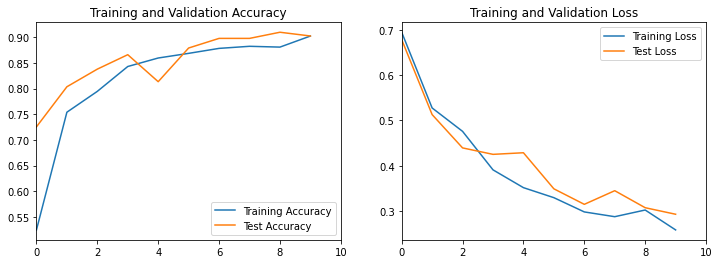

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(val_acc))
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, len(val_acc))

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend()
plt.xlim(0, len(val_acc))
plt.title('Training and Validation Loss')
plt.show()

In [67]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets
